# 1. Binary Classification 

In [1]:
import os
os.chdir("..") 
print(os.getcwd())  

d:\Programing\Data Science\Deep Learning Implementations\Deep-Learning-from-Scratch


In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from neural_network import NeuralNetwork 

In [3]:
data = load_breast_cancer()
X, Y = data.data, data.target

In [4]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
X.shape, Y.shape

((569, 30), (569,))

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.reshape(1, -1), Y_test.reshape(1, -1)

In [10]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((30, 455), (30, 114), (1, 455), (1, 114))

In [11]:
nn = NeuralNetwork(
    layers_dims=[X_train.shape[0], 128, 64, 32, 16, 1],
    activations=['relu', 'relu', 'relu', 'relu', 'sigmoid'],
    loss='binary_cross_entropy'
)

nn.summary()

Neural Network Architecture:
 Layer 1: 30 → 128 (relu)
 Layer 2: 128 → 64 (relu)
 Layer 3: 64 → 32 (relu)
 Layer 4: 32 → 16 (relu)
 Layer 5: 16 → 1 (sigmoid)
 Loss Function: binary_cross_entropy


In [12]:
nn.train(X_train, Y_train, epochs=5000, lr=0.1)


Epoch 0: loss = 0.7348
Epoch 1: loss = 0.7345
Epoch 2: loss = 0.7343
Epoch 3: loss = 0.7340
Epoch 4: loss = 0.7337
Epoch 5: loss = 0.7334
Epoch 6: loss = 0.7331
Epoch 7: loss = 0.7329
Epoch 8: loss = 0.7326
Epoch 9: loss = 0.7323
Epoch 10: loss = 0.7320
Epoch 11: loss = 0.7318
Epoch 12: loss = 0.7315
Epoch 13: loss = 0.7312
Epoch 14: loss = 0.7309
Epoch 15: loss = 0.7306
Epoch 16: loss = 0.7304
Epoch 17: loss = 0.7301
Epoch 18: loss = 0.7298
Epoch 19: loss = 0.7295
Epoch 20: loss = 0.7293
Epoch 21: loss = 0.7290
Epoch 22: loss = 0.7287
Epoch 23: loss = 0.7285
Epoch 24: loss = 0.7282
Epoch 25: loss = 0.7279
Epoch 26: loss = 0.7276
Epoch 27: loss = 0.7274
Epoch 28: loss = 0.7271
Epoch 29: loss = 0.7268
Epoch 30: loss = 0.7265
Epoch 31: loss = 0.7263
Epoch 32: loss = 0.7260
Epoch 33: loss = 0.7257
Epoch 34: loss = 0.7255
Epoch 35: loss = 0.7252
Epoch 36: loss = 0.7249
Epoch 37: loss = 0.7247
Epoch 38: loss = 0.7244
Epoch 39: loss = 0.7241
Epoch 40: loss = 0.7239
Epoch 41: loss = 0.7236
Ep

In [13]:
Y_pred = nn.predict(X_test)
Y_pred

array([[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 1]])

In [14]:
nn.evaluate(X_test, Y_test)

Evaluation results:
 Loss = 1.2927
 Accuracy = 92.98%


(1.2926793594865829, 0.9298245614035088)

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

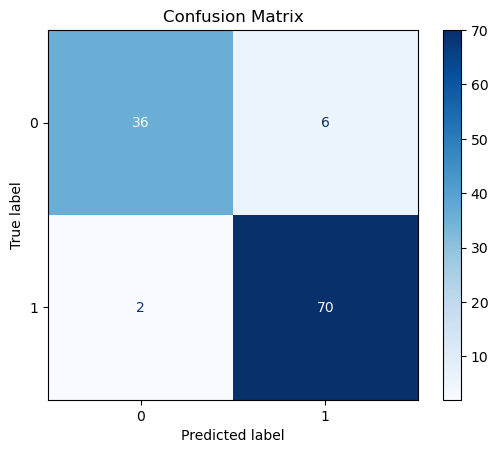

In [16]:
cm = confusion_matrix(Y_test.flatten(), Y_pred.flatten())

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [17]:
print(classification_report(Y_pred.flatten(), Y_test.flatten()))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.97      0.92      0.95        76

    accuracy                           0.93       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



# 2. Regression

In [18]:
from sklearn.datasets import fetch_california_housing

In [19]:
data = fetch_california_housing()
X, Y = data.data, data.target
print(X.shape, Y.shape)

(20640, 8) (20640,)


In [20]:
Y = Y.reshape(1, -1)

In [21]:
Y.shape

(1, 20640)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.T, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).T
X_test = scaler.transform(X_test).T
Y_train = Y_train.T
Y_test = Y_test.T

In [24]:
nn = NeuralNetwork(
    layers_dims=[X_train.shape[0], 64, 32, 16, 1],
    activations=['relu', 'relu', 'relu', 'linear'], 
    loss='mse'
)

nn.summary()

Neural Network Architecture:
 Layer 1: 8 → 64 (relu)
 Layer 2: 64 → 32 (relu)
 Layer 3: 32 → 16 (relu)
 Layer 4: 16 → 1 (linear)
 Loss Function: mse


In [26]:
nn.train(X_train, Y_train, epochs=2000, lr=0.1, print_loss=True)

Epoch 0: loss = 2.8074
Epoch 1: loss = 2.8069
Epoch 2: loss = 2.8065
Epoch 3: loss = 2.8061
Epoch 4: loss = 2.8057
Epoch 5: loss = 2.8053
Epoch 6: loss = 2.8048
Epoch 7: loss = 2.8044
Epoch 8: loss = 2.8040
Epoch 9: loss = 2.8036
Epoch 10: loss = 2.8032
Epoch 11: loss = 2.8027
Epoch 12: loss = 2.8023
Epoch 13: loss = 2.8019
Epoch 14: loss = 2.8015
Epoch 15: loss = 2.8011
Epoch 16: loss = 2.8006
Epoch 17: loss = 2.8002
Epoch 18: loss = 2.7998
Epoch 19: loss = 2.7994
Epoch 20: loss = 2.7990
Epoch 21: loss = 2.7985
Epoch 22: loss = 2.7981
Epoch 23: loss = 2.7977
Epoch 24: loss = 2.7973
Epoch 25: loss = 2.7969
Epoch 26: loss = 2.7964
Epoch 27: loss = 2.7960
Epoch 28: loss = 2.7956
Epoch 29: loss = 2.7952
Epoch 30: loss = 2.7948
Epoch 31: loss = 2.7943
Epoch 32: loss = 2.7939
Epoch 33: loss = 2.7935
Epoch 34: loss = 2.7931
Epoch 35: loss = 2.7927
Epoch 36: loss = 2.7923
Epoch 37: loss = 2.7918
Epoch 38: loss = 2.7914
Epoch 39: loss = 2.7910
Epoch 40: loss = 2.7906
Epoch 41: loss = 2.7902
Ep

In [27]:
Y_pred = nn.predict(X_test)
mse = np.mean((Y_pred - Y_test)**2)
print(f"\nTest MSE: {mse:.4f}")


Test MSE: 4.3330


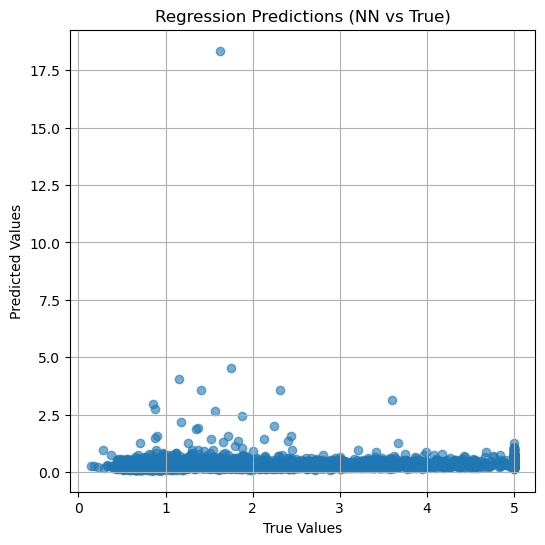

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(Y_test.flatten(), Y_pred.flatten(), alpha=0.6)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Regression Predictions (NN vs True)")
plt.grid(True)
plt.show()